# Sınıflandırma analizi 

### Sınıflandırma Analizi  için 'Random Forest', 'K-En Yakın Komşuluk', 'Destek Vektör Makineleri', 'Logistic Regression' makine öğrenmesi teknikleri kullanacağız. 

    1. Veri Seti Yükleme ve Temizleme

    2. Değişkenler ayırma ve Veri Kümesinde Eğitim/Test verileri ayırma
    
    3. Makine Öğrenmesi Modelini Eğitme
        
    4. Sınıflandırma Modelin Performans Karşılaştırması
    
    5. Sınıflandırıcı Modellerinin Konfisyon Matrisi


##   1. Veri Seti Yükleme ve Temizleme

In [1]:
# İlk olarak, Pandas ve Numpy ve Scikit-Learn kütüphanelerini yükleyeceğiz.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Veri setini yükleme 

data = pd.read_excel("/Users/ideakadikoy/Desktop/siniflandirma_data.xlsx")

In [3]:
data.describe()

,x,y
count,986.000000,986.000000
mean,0.347448,0.577303
std,0.102182,0.208662
min,-0.087983,0.047147
25%,0.282001,0.440755
50%,0.353474,0.589722
75%,0.417592,0.716705
max,0.576219,1.000000


In [4]:
# Veri setindeki sınıfların sayısı ve dağılımı
print(data['Class'].value_counts())

C2    365
C1    183
C4    173
C3    169
C5     96
Name: Class, dtype: int64


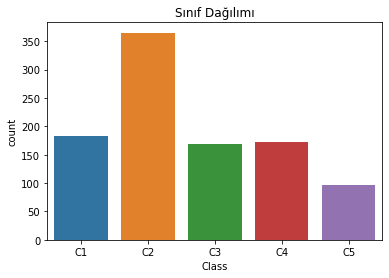

In [5]:
import seaborn as sns

sns.countplot(x='Class', data=data) #veri setindeki bir sütunu saymak ve görselleştirmek"countplout"
plt.title('Sınıf Dağılımı')
plt.show()

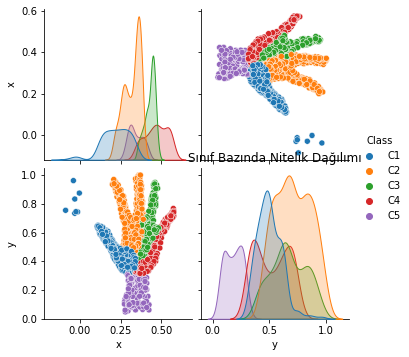

In [6]:
sns.pairplot(data, hue='Class', vars=['x', 'y'])
#Seaborn veri görselleştirme kütüphanesini kullanarak veri setindeki değişkenler arasındaki ilişkileri incelemek için pairplot() fonksiyonunu kullanılır.
plt.title('Sınıf Bazında Nitelik Dağılımı')
plt.show()

## 2. Değişkenler ayırma ve Veri Kümesinde Eğitim/Test verileri ayırma


In [7]:
# Veri setindeki özellikler ve hedef değişkeni
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [8]:
# Train-test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Makine Öğrenmesi Modelini Eğitme

    SVM = verileri sınıflandırmak veya regresyon problemlerini çözmek için bir ayrıştırma hiper düzlemi kullanır ve bu düzlemdeki sınıf ayrımı, verilerin farklı sınıflara ait özelliklerini belirleyen destek vektörleri kullanarak yapılır.

    KNN= örneklerin benzerliğine dayalı olarak sınıflandırma veya regresyon yapabilen bir makine öğrenmesi algoritmasıdır.

    RF = çok sayıda karar ağacını (decision tree) kullanarak verileri eğiten ve tahmin yapabilen bir makine öğrenmesi algoritmasıdır.

    LR= doğrusal bir ayrıştırma yüzeyi kullanarak sınıflar arasındaki ayrımı yapar ve sonuç olarak sınıfların olasılık dağılımını elde eder.


In [9]:
# scikit-learn kütüphanesinden Modellerimi çağıyoruz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [10]:
svm = SVC(kernel='poly', degree=2) #kernel='poly', degree=2 parametreleri, verileri polinom çekirdeği kullanarak sınıflandırmasını sağlar ve bu çekirdek için polinom derecesini 2 olarak ayarlar.
rf = RandomForestClassifier(n_estimators=100, random_state=42) # random_state ile rastgelelik kontrol ediyoruz. # n_estimators=100 karar agacı sayısını belirler
lr = LogisticRegression(fit_intercept=True, random_state = 42) # fit_intercept: Bu parametre, eğriye bir y-kesit eklemek için kullanılır.
knn = KNeighborsClassifier(n_neighbors=5) # n_neighbors=5 komşu sayısını belirler


In [11]:
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
# Tahminleri yap
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

## 4. Sınıflandırma Modelin Performans Karşılaştırması

### Random Forest

In [13]:
# Test setinde modelin performansı
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

In [14]:
print("Random Forest: ")
print("Accuracy: ", rf_accuracy)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1 Score: ", rf_f1)

Random Forest: 
Accuracy:  0.9763513513513513
Precision:  0.976574750279308
Recall:  0.9763513513513513
F1 Score:  0.9763822037331211


### Destek Vektör Makinesi

In [15]:
# Test setinde modelin performansı
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test,svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

In [16]:
print("Destek Vektör Makinesi: ")
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1 Score: ", svm_f1)

Destek Vektör Makinesi: 
Accuracy:  0.9459459459459459
Precision:  0.9489555037083319
Recall:  0.9459459459459459
F1 Score:  0.9453931932496726


### K-En Yakın Komşuluk

In [17]:
# Test setinde modelin performansı
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test,knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

In [18]:
print("K-En Yakın Komşuluk: ")
print("Accuracy: ", knn_accuracy)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1 Score: ", knn_f1)

K-En Yakın Komşuluk: 
Accuracy:  0.9695945945945946
Precision:  0.9700422631655964
Recall:  0.9695945945945946
F1 Score:  0.9694230252663458


### Lojistik Regresyon

In [19]:
# Test setinde modelin performansı
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test,lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

In [20]:
print("Lojistik Regresyon: ")
print("Accuracy: ", lr_accuracy)
print("Precision: ", lr_precision)
print("Recall: ", lr_recall)
print("F1 Score: ", lr_f1)

Lojistik Regresyon: 
Accuracy:  0.7195945945945946
Precision:  0.6300043661245992
Recall:  0.7195945945945946
F1 Score:  0.6609961208433195


##  5. Sınıflandırıcı Modellerinin Konfisyon Matrisi


In [21]:
print("K-En Yakın Komşuluk Konfisyon Matrisi: ")

from sklearn.metrics import confusion_matrix
knn = confusion_matrix(y_test, knn_pred)
print(knn)

K-En Yakın Komşuluk Konfisyon Matrisi: 
[[50  1  3  1  0]
 [ 0 98  0  0  0]
 [ 0  2 53  0  0]
 [ 1  0  1 53  0]
 [ 0  0  0  0 33]]


In [22]:
print("Lojistik Regresyon Konfisyon Matrisi: ")

from sklearn.metrics import confusion_matrix
lr = confusion_matrix(y_test, lr_pred)
print(lr)

Lojistik Regresyon Konfisyon Matrisi: 
[[42 13  0  0  0]
 [ 0 98  0  0  0]
 [ 0 39  0 16  0]
 [ 2  0 10 42  1]
 [ 1  0  0  1 31]]


In [23]:
print("Destek Vektör Makinesi Konfisyon Matrisi: ")

from sklearn.metrics import confusion_matrix
svm = confusion_matrix(y_test, svm_pred)
print(svm)

Destek Vektör Makinesi Konfisyon Matrisi: 
[[51  4  0  0  0]
 [ 1 97  0  0  0]
 [ 1  6 46  2  0]
 [ 1  0  0 54  0]
 [ 0  0  0  1 32]]


In [24]:
print("Random Forest Konfisyon Matrisi: ")

from sklearn.metrics import confusion_matrix
rf = confusion_matrix(y_test, rf_pred)
print(rf)

Random Forest Konfisyon Matrisi: 
[[53  1  0  1  0]
 [ 1 95  2  0  0]
 [ 0  1 54  0  0]
 [ 0  0  1 54  0]
 [ 0  0  0  0 33]]
